## Importing Necessary Libraries ..!!!

In [2]:
import pandas as pd
import os as os
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
os.chdir("D:\PREPLEAF MATERIAL\PANDAS\Project Pandas")
print(os.getcwd())

D:\PREPLEAF MATERIAL\PANDAS\Project Pandas


## Importing & Merging Multiple Data File

In [4]:
files = sorted(glob('D:\PREPLEAF MATERIAL\PANDAS\Project Pandas\Sales_Data\Sales_*.csv'))
files

['D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_April_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_August_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_December_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_February_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_January_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_July_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_June_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_March_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_May_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_November_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales_October_2019.csv',
 'D:\\PREPLEAF MATERIAL\\PANDAS\\Project Pandas\\Sales_Data\\Sales

In [5]:
all_data = pd.concat((pd.read_csv(file).assign(filename = file) 
          for file in files), ignore_index = True )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",D:\PREPLEAF MATERIAL\PANDAS\Project Pandas\Sal...
1,NaN,NaN,NaN,NaN,NaN,NaN,D:\PREPLEAF MATERIAL\PANDAS\Project Pandas\Sal...
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",D:\PREPLEAF MATERIAL\PANDAS\Project Pandas\Sal...
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",D:\PREPLEAF MATERIAL\PANDAS\Project Pandas\Sal...
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",D:\PREPLEAF MATERIAL\PANDAS\Project Pandas\Sal...


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### Deleting Unnecessary Column.!!

In [6]:
del all_data['filename']

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
all_data.shape

(186850, 6)

In [9]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
all_data[all_data.isnull().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [15]:
all_data = all_data[all_data['Month'] != 'Or']

### Adding a Month Column

In [14]:
#  all_data['Order Date'] = all_data['Order Date'].str.replace("( ).*","")
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### Changing Datatypes of Necessary Columns

In [16]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype("int32")
all_data["Month"] = all_data['Month'].astype('int32')
all_data["Price Each"] = all_data['Price Each'].astype('float')

C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/3671331362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype("int32")
C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/3671331362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data['Month'].astype('int32')
C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/3671331362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [17]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

### Adding a City Column..!!!

In [18]:
def get_city(address):
    return address.split(',')[1].strip(' ')
def get_state(address):
    return address.split(',')[1].split(' ')[1]
all_data["City"] = all_data["Purchase Address"].apply( lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head(1)

C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/2489565653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"] = all_data["Purchase Address"].apply( lambda x: f"{get_city(x)} ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (Dallas)


### Adding a Count, Hour & Minute Column..!!

In [38]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head(1)

C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/3295934346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/3295934346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/3295934346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (Dallas),23.9,8,46,1


### Adding a Sales Column.!!

In [19]:
all_data['Sales'] = all_data['Price Each'].astype('float') * all_data['Quantity Ordered'].astype('int')
all_data

C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/2508956590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Price Each'].astype('float') * all_data['Quantity Ordered'].astype('int')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (Dallas),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (Boston),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (Los),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (Los),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (Los),11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (Los),8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (San),700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (San),700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (San),379.99


#### Converting String to Date Time.!

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.dtypes

C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/1990504520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
City                        object
Sales                      float64
dtype: object

## Data Exploration.!!!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [25]:
all_data_1 = all_data.groupby(['Month'] , as_index = False).sum()
all_data_1.head(12)

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


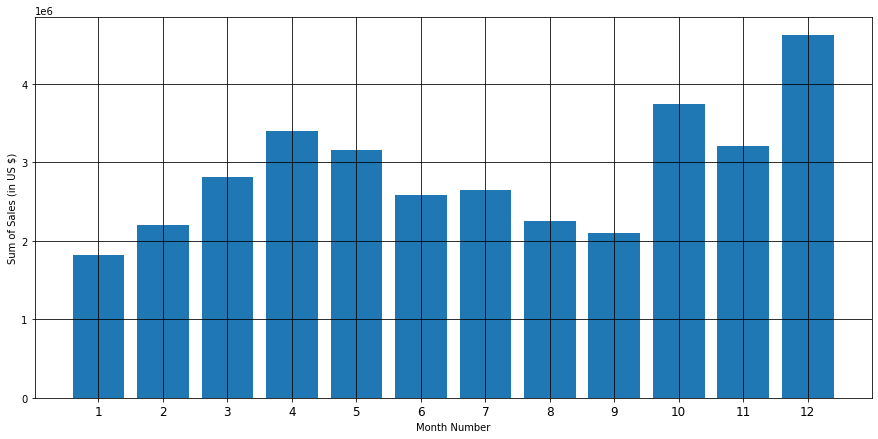

In [122]:
y = all_data_1['Sales']
x = all_data_1['Month']
fig = plt.figure(figsize=(15,7))
plt.bar(x,all_data.groupby(['Month']).sum()["Sales"])
plt.xticks(x,fontsize = '12')
plt.xlabel("Month Number") 
plt.ylabel("Sum of Sales (in US $)")
plt.grid(color = 'black')
plt.show()

#### Question 2: What city sold the most product?

In [27]:
all_data_2 = all_data.groupby(['City'] , as_index = False).sum()
all_data_2.head()

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (Atlanta),16602,2779908.20,104794,2795498.58
1,Austin (Austin),11153,1809873.61,69829,1819581.75
2,Boston (Boston),22528,3637409.77,141112,3661642.01
3,Dallas (Dallas),16730,2752627.82,104620,2767975.40
4,Los Angeles (Los),33289,5421435.23,208325,5452570.80


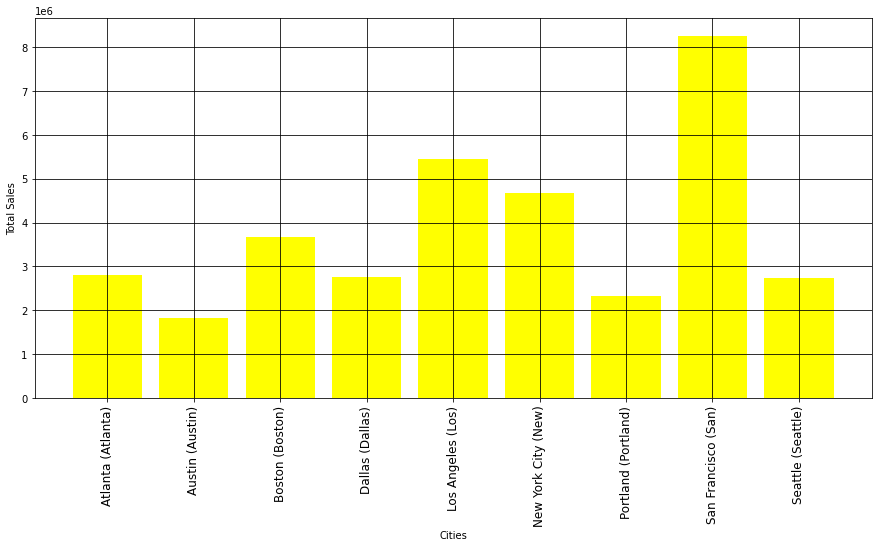

In [121]:
x = all_data_2["City"]
y = all_data_2["Sales"]
fig = plt.figure(figsize=(15,7))
plt.bar(x,y,color = "yellow")
plt.xticks(x)
plt.xticks(rotation='vertical', fontsize = '12')
plt.xlabel("Cities")
plt.ylabel("Total Sales")
plt.grid(color = 'black')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [46]:
all_data_3 = all_data.groupby(['Hour'] , as_index = False).sum()
all_data_3.head(2)

,Hour,Quantity Ordered,Price Each,Month,Sales,Minute,Count
0,0,4428,709296.7,27554,713721.27,103596,3910
1,1,2619,458490.0,16657,460866.88,61807,2350


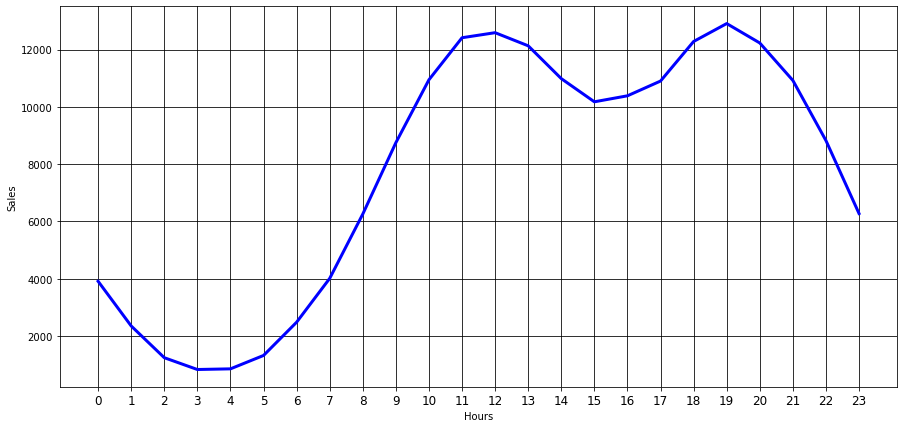

In [120]:
x = all_data_3['Hour']
y = all_data_3['Count']
fig = plt.figure(figsize = (15,7))
plt.plot(x , y , color = 'Blue', linewidth = 3)
plt.xticks(x , fontsize = '12')
plt.xlabel("Hours")
plt.ylabel("Sales")
plt.grid(color = 'black')
plt.show()

#### Question 4: What product sold the most? Why do you think it sold the most?

In [55]:
all_data_4 = all_data.groupby(['Product'] , as_index = False).sum()
all_data_4.head()

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577


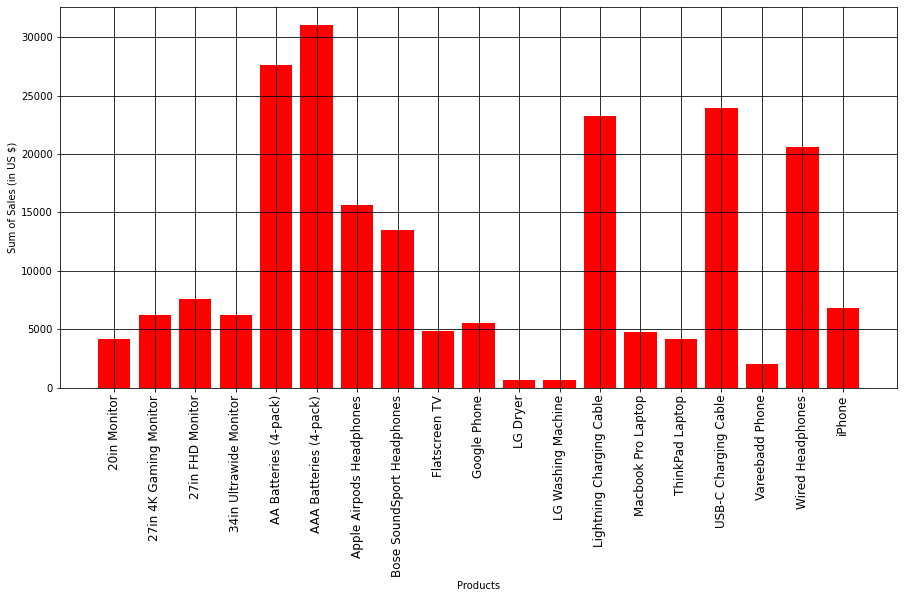

In [119]:
x = all_data_4['Product']
y = all_data_4['Quantity Ordered']
fig = plt.figure(figsize = (15,7))
plt.bar(x,y,color = 'red' )
plt.xticks(x,rotation = 'vertical', fontsize = '12')
plt.xlabel("Products")
plt.ylabel("Sum of Sales (in US $)")
plt.grid(color = 'black')
plt.show()

C:\Users\anidi\AppData\Local\Temp/ipykernel_5240/618296454.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation = 'vertical', fontsize = '12')


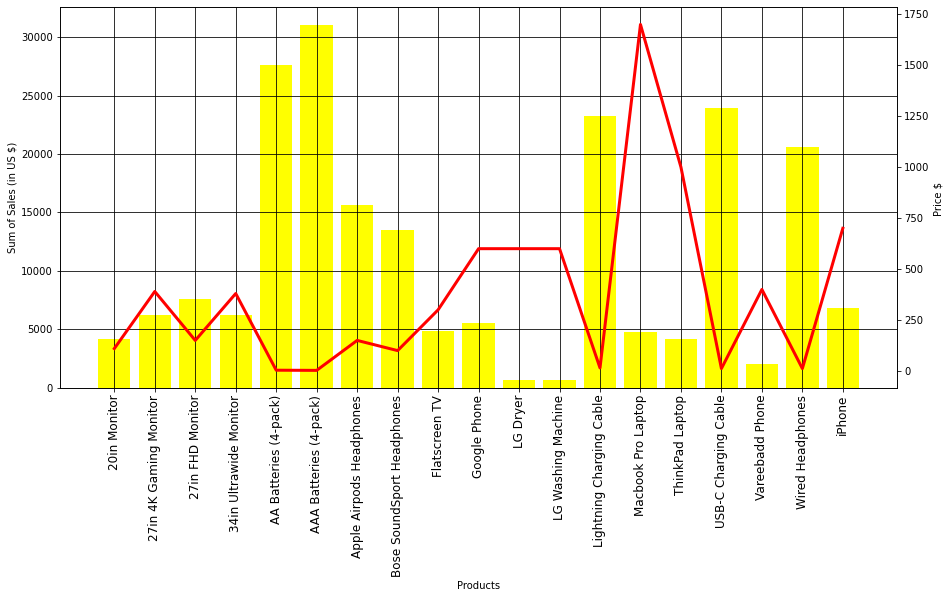

In [118]:
x = all_data_4['Product']
y = all_data_4['Quantity Ordered']
y2 = all_data.groupby(['Product'] , as_index = False).mean()['Price Each']

fig, ax1 = plt.subplots(figsize = (15,7) )
ax2 = ax1.twinx()

ax1.bar(x,y,color = 'yellow' )
ax2.plot(x,y2,color = 'red',  linewidth = 3)
ax1.yaxis.grid( color='black', linestyle = '-')
ax1.xaxis.grid( color='black', linestyle = '-')
ax1.set_xticklabels(x,rotation = 'vertical', fontsize = '12')
ax1.set_xlabel("Products")
ax2.set_ylabel("Price $ ")
ax1.set_ylabel("Sum of Sales (in US $)")
plt.show()